# Satellite Image Exploratory Analysis

This notebook explores the satellite imagery associated with property locations.
The objective is to qualitatively assess whether visual neighborhood characteristics
(such as greenery, road density, and land use patterns) differ across property price ranges.

## 1. Setup and Imports

We import required libraries for image loading, visualization, and data handling.
All images are fetched programmatically using geographic coordinates and stored locally.

In [1]:
import numpy as np
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt
import os

## 2. Random Satellite Image Samples

We begin by visualizing a random subset of satellite images to verify data quality
and understand the general visual patterns present in the dataset.

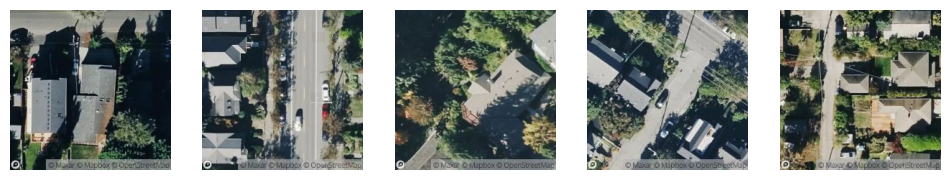

In [2]:
imgs = random.sample(os.listdir("../data/images/train"), 5)

plt.figure(figsize=(12,4))
for i, img in enumerate(imgs):
    im = Image.open(f"../data/images/train/{img}")
    plt.subplot(1,5,i+1)
    plt.imshow(im)
    plt.axis("off")
plt.show()

The randomly sampled images confirm that the dataset captures diverse neighborhood
contexts, including residential layouts, road networks, and varying levels of vegetation.
Image resolution and alignment appear consistent across samples.

## 3. Price Based Segmentation

To analyze how visual patterns vary with property value, we segment properties into
price based buckets using quantiles.

In [3]:
train = pd.read_csv("../data/processed/train_sampled.csv")

train["price_bucket"] = pd.qcut(
    train["price"],
    q=4,
    labels=["Low", "Mid-Low", "Mid-High", "High"]
)

Dividing properties into price buckets enables structured comparison between
low-priced and high-priced properties without relying on absolute thresholds.

A helper function is defined to format prices consistently for visualization overlays.

In [4]:
def format_price(price):
    return f"${price:,.0f}"

## 4. Visual Analysis of Price Extremes

We first examine satellite imagery corresponding to the lowest priced properties
to identify visual characteristics associated with lower valuations.

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

IMG_DIR = "../data/images/train"

def show_lowest_priced(n=5):
    lowest = train.sort_values("price").head(n)

    plt.figure(figsize=(14, 4))

    for i, (_, row) in enumerate(lowest.iterrows()):
        img = Image.open(os.path.join(IMG_DIR, f"{row['id']}.png"))

        ax = plt.subplot(1, n, i+1)
        ax.imshow(img)
        ax.axis("off")

        price_text = format_price(row["price"])

        rect = patches.Rectangle(
            (5, 5), 160, 30,
            linewidth=0,
            facecolor="black",
            alpha=0.6
        )
        ax.add_patch(rect)

        ax.text(
            10, 25,
            price_text,
            color="white",
            fontsize=10,
            weight="bold"
        )

    plt.suptitle("Lowest Priced Properties (Extremes)", fontsize=15)
    plt.show()

We next visualize satellite imagery for the highest priced properties to contrast
their neighborhood characteristics with lower priced examples.

In [6]:
def show_highest_priced(n=5):
    highest = train.sort_values("price", ascending=False).head(n)

    plt.figure(figsize=(14, 4))

    for i, (_, row) in enumerate(highest.iterrows()):
        img = Image.open(os.path.join(IMG_DIR, f"{row['id']}.png"))

        ax = plt.subplot(1, n, i+1)
        ax.imshow(img)
        ax.axis("off")

        price_text = format_price(row["price"])

        rect = patches.Rectangle(
            (5, 5), 160, 30,
            linewidth=0,
            facecolor="black",
            alpha=0.6
        )
        ax.add_patch(rect)

        ax.text(
            10, 25,
            price_text,
            color="white",
            fontsize=10,
            weight="bold"
        )

    plt.suptitle("Highest Priced Properties (Extremes)", fontsize=15)
    plt.show()

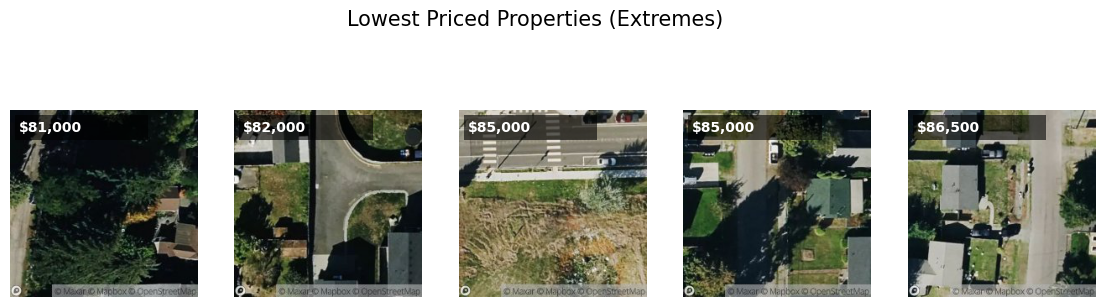

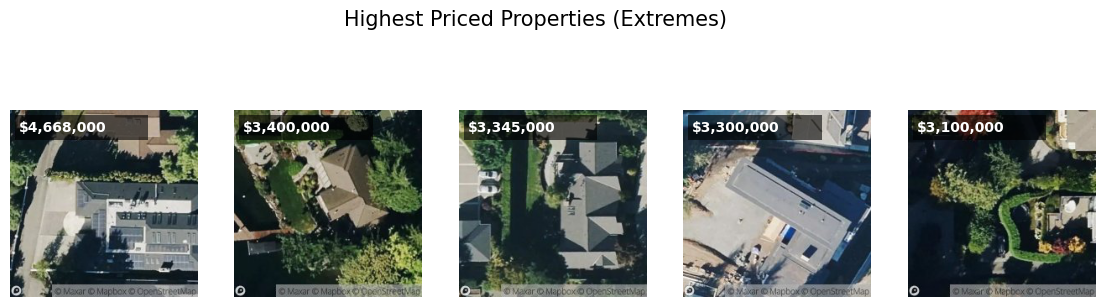

In [7]:
show_lowest_priced(5)
show_highest_priced(5)

High-priced properties commonly exhibit:
- Larger plots and structured layouts
- Higher levels of greenery and open space
- Lower road density and more organized surroundings

These visual cues align with known real estate valuation drivers and support
the hypothesis that satellite imagery captures meaningful neighborhood context.

## Summary and Insights

The visual differences between low and high priced properties are pronounced.
Satellite imagery reveals neighborhood level cues such as land use patterns,
green cover, and spatial organization that are not fully represented by tabular features.

These observations provide strong qualitative motivation for incorporating
satellite imagery into a multimodal property valuation model.